In [1]:
"""
A simple Polynomial Regression model with COVID-19 datasets

Data Repository by Johns Hopkins CSSE: https://github.com/CSSEGISandData/COVID-19

@author: thanos
"""
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [12]:
#import data

# fetch from web
#confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
#deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
#recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')

#stored data
confirmed = pd.read_csv('data/time_series_19-covid-Confirmed.csv')

In [13]:
# create datasets from datagram

# available dates in mm/dd/yyyy format
dates = list(confirmed)
dates = dates[4:np.size(dates)]

# assign to dataframe
df = confirmed
# select country of interest
country = 'Greece'
loc = df.loc[df['Country/Region'] == country]
idx = int(loc.index.values)
#get only numeric data
num = df._get_numeric_data()
# data preparation 
y = list(num.values[idx,2: int(num.size)]) #get list of values
y = np.array(y) #convert into a numpy array
y = y[~np.isnan(y)] #remove nan entries
x = np.array(range(np.size(y)))#to numpy array
x = x[~np.isnan(x)] #remove nan entries
X = x.reshape(-1, 1)

# if nans are removed, check if dates list has the same size as y an equalize
if np.abs(np.size(dates)-np.size(y)) > 0:
    diff = np.size(dates)-np.size(y)
    del dates[-diff]
    print('\nRemoved ' + str(diff) + ' value(s)\n')

In [14]:
# Fitting a Polynomial Regression to the dataset
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

y_pred = pol_reg.predict(poly_reg.fit_transform(X))#predicted values
rsqrd = r2_score(y, y_pred) #r-squared

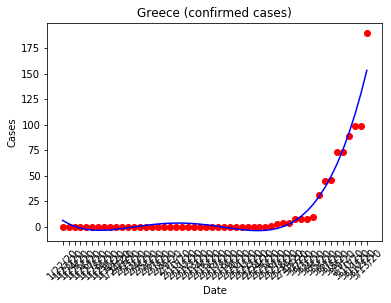

In [15]:
# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(np.array(dates), y, color='red')
    plt.plot(X, y_pred, color='blue')
    plt.xticks(rotation=45)
    plt.title(country + " (confirmed cases)")
    plt.xlabel('Date')
    plt.ylabel('Cases')
    plt.show()
    return
viz_polymonial()

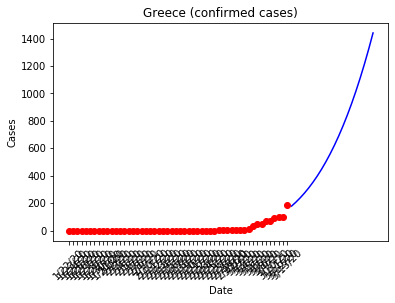

In [16]:
#plot forecasted values
days = 20 #days ahead
xf = np.arange(np.size(x),np.size(y)+ days) #append days to foarecast
xf= xf.reshape(-1, 1)
yf = pol_reg.predict(poly_reg.fit_transform(xf))
# Visualizing the Polymonial Regression results
def viz_forecast():
    plt.scatter(np.array(dates), y, color='red')
    plt.plot(xf, yf, color='blue')
    plt.xticks(rotation=45)
    plt.title(country + " (confirmed cases)")
    plt.xlabel('Date')
    plt.ylabel('Cases')
    plt.show()
    return
viz_forecast()

In [17]:
# print results
print('Current cases: '+ str([y[np.size(y)-1]]) + '\nPredicted: ' + str(pol_reg.predict(poly_reg.fit_transform([[np.size(y)]]))) + '\nDiff: ' + str(pol_reg.predict(poly_reg.fit_transform([[np.size(y)]])) - y[np.size(y)-1])+'\nr-squared: '+ str(np.round(rsqrd,2)))
print('\nNext day prediction: '+str(pol_reg.predict(poly_reg.fit_transform([[np.size(y) + 1]]))))


Current cases: [190.0]
Predicted: [178.9434874]
Diff: [-11.0565126]
r-squared: 0.95

Next day prediction: [207.3630493]


In [18]:
# save model (pickle)
# toDo